# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 50

# Create empty lists to store the responses
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("----------------------------------")

# Make a request for each of the cities
for x in range(len(cities)):

    try:
        # Build partial query URL
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        
        # Display print log of each city
        print(f"Processing Record {x} | {cities[x]}")

        # Get one of the cities
        response = requests.get(query_url + str(cities[x])).json()

        # Save city's JSON
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
            
    except:
        # Display comment when error occurs
        print("City not found. Skipping...")
    
print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Beginning Data Retrieval
----------------------------------
Processing Record 0 | hermanus
Processing Record 1 | sorong
Processing Record 2 | rocha
Processing Record 3 | yellowknife
Processing Record 4 | taolanaro
City not found. Skipping...
Processing Record 5 | talnakh
Processing Record 6 | arraial do cabo
Processing Record 7 | najran
Processing Record 8 | misratah
Processing Record 9 | hobyo
Processing Record 10 | kruisfontein
Processing Record 11 | umzimvubu
City not found. Skipping...
Processing Record 12 | batesville
Processing Record 13 | ituni
City not found. Skipping...
Processing Record 14 | vaini
Processing Record 15 | bara
Processing Record 16 | bethel
Processing Record 17 | punta arenas
Processing Record 18 | nagram
Processing Record 19 | mataura
Processing Record 20 | zhigansk
Processing Record 21 | cotui
Processing Record 22 | cockburn town
Processing Record 23 | busselton
Processing Record 24 | amderma
City not found. Skipping...
Processing Record 25 | puerto ayora
Proc

Processing Record 231 | chicama
Processing Record 232 | bilibino
Processing Record 233 | mayumba
Processing Record 234 | te anau
Processing Record 235 | harsin
Processing Record 236 | port blair
Processing Record 237 | rawson
Processing Record 238 | manitouwadge
Processing Record 239 | waingapu
Processing Record 240 | tashtyp
Processing Record 241 | gobabis
Processing Record 242 | nishihara
Processing Record 243 | coahuayana
Processing Record 244 | tuatapere
Processing Record 245 | fortuna
Processing Record 246 | klaksvik
Processing Record 247 | namatanai
Processing Record 248 | oxelosund
Processing Record 249 | tazovskiy
Processing Record 250 | kahului
Processing Record 251 | nova olinda do norte
Processing Record 252 | codrington
Processing Record 253 | san quintin
Processing Record 254 | paamiut
Processing Record 255 | vardo
Processing Record 256 | leningradskiy
Processing Record 257 | henties bay
Processing Record 258 | kharan
Processing Record 259 | bengkulu
Processing Record 260 

Processing Record 464 | brae
Processing Record 465 | lodwar
Processing Record 466 | stoyba
City not found. Skipping...
Processing Record 467 | caconda
Processing Record 468 | kamaishi
Processing Record 469 | ribeira brava
Processing Record 470 | iqaluit
Processing Record 471 | pathalgaon
Processing Record 472 | saint-georges
Processing Record 473 | conde
Processing Record 474 | nizhneyansk
City not found. Skipping...
Processing Record 475 | namibe
Processing Record 476 | arica
Processing Record 477 | morondava
Processing Record 478 | mbekenyera
Processing Record 479 | trinidad
Processing Record 480 | utiroa
City not found. Skipping...
Processing Record 481 | camden
Processing Record 482 | pali
Processing Record 483 | pavilosta
Processing Record 484 | north bend
Processing Record 485 | milkovo
Processing Record 486 | uvinza
Processing Record 487 | saint-leu
Processing Record 488 | mangan
Processing Record 489 | yanchukan
City not found. Skipping...
Processing Record 490 | khor
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dictionary of city data
cities_dict = {
    "City": city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create dataframe of city data
cities_data = pd.DataFrame(cities_dict)

# Export data to csv
cities_data.to_csv("Cities_Output.csv")

# Display the dataframe
cities_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,2,ZA,1584490056,93,-34.42,19.23,63.00,1.14
1,Sorong,0,ID,1584490130,67,-0.88,131.25,83.21,2.53
2,Rocha,100,UY,1584490131,77,-34.48,-54.33,64.78,10.54
3,Yellowknife,75,CA,1584490006,64,62.46,-114.35,1.99,5.82
4,Talnakh,75,RU,1584489899,92,69.49,88.40,10.40,26.84
...,...,...,...,...,...,...,...,...,...
567,Xinmin,74,CN,1584490848,25,41.99,122.83,53.60,11.18
568,Coari,100,BR,1584490849,96,-4.08,-63.14,76.12,1.54
569,Mozelos,1,PT,1584490851,76,41.87,-8.40,60.01,2.24
570,Eshowe,100,ZA,1584490852,73,-28.89,31.47,63.81,11.74


In [5]:
# View number of records in each column of dataframe
cities_data.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

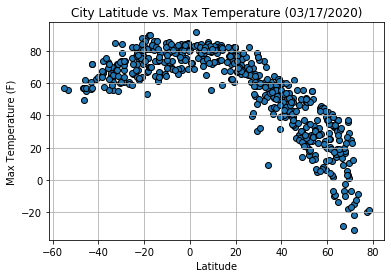

In [9]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/17/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_MaxTemperature.png")

# Show plot
plt.show()

### Analysis
The City Latitude vs. Max Temperature scatter plot code shows that maximum temperature of a city increases as you move closer to the equator (latitude = 0). It decreases rapidly as you move north of the equator.

#### Latitude vs. Humidity Plot

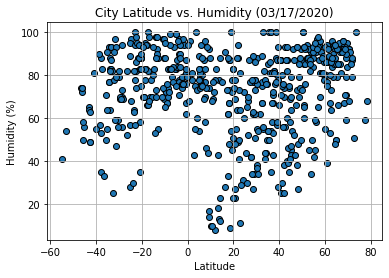

In [10]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/17/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

### Analysis
The City Latitude vs. Humidity scatter plot shows that cities within the latitude range of -60 to 80 tend to have high humidity rates.

#### Latitude vs. Cloudiness Plot

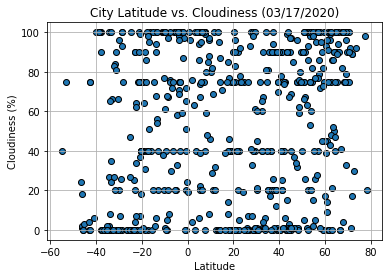

In [11]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/17/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

### Analysis
The City Latitude vs. Cloudiness scatter plot does not show a strong relationship between the 2 factors, with data points distributed fairly evenly.

#### Latitude vs. Wind Speed Plot

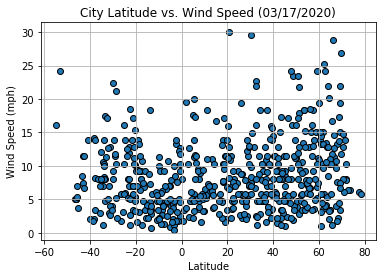

In [12]:
# Build a scatter plot for each data type
plt.scatter(cities_data["Lat"], cities_data["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/17/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()

### Analysis
The City Latitude vs. Wind Speed scatter plot shows that cities around the equator tend to have very low wind speeds on this particular day.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

x_values = cities_data['Lat']
y_values = cities_data['Max Temp']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.56x +66.43


In [14]:
# Create Northern and Southern Hemisphere DataFrames

north_df = cities_data.loc[cities_data['Lat'] >= 0, :]
#north_df

south_df = cities_data.loc[cities_data['Lat'] < 0, :]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,2,ZA,1584490056,93,-34.42,19.23,63.00,1.14
1,Sorong,0,ID,1584490130,67,-0.88,131.25,83.21,2.53
2,Rocha,100,UY,1584490131,77,-34.48,-54.33,64.78,10.54
5,Arraial do Cabo,90,BR,1584490095,100,-22.97,-42.03,71.60,6.93
9,Kruisfontein,0,ZA,1584490140,83,-34.00,24.73,62.49,8.39
...,...,...,...,...,...,...,...,...,...
556,Bagotville,26,AU,1584490834,69,-28.98,153.42,73.40,11.41
557,Ariquemes,100,BR,1584490804,88,-9.91,-63.04,77.52,1.99
562,Port Augusta,0,AU,1584490842,25,-32.50,137.77,84.99,17.22
568,Coari,100,BR,1584490849,96,-4.08,-63.14,76.12,1.54


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8858961135530402


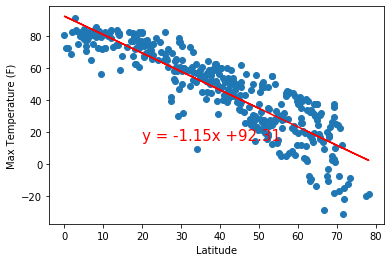

In [26]:
# Store data as x and y values
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Northern_Hemisphere-Max_Temp_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6179404993275422


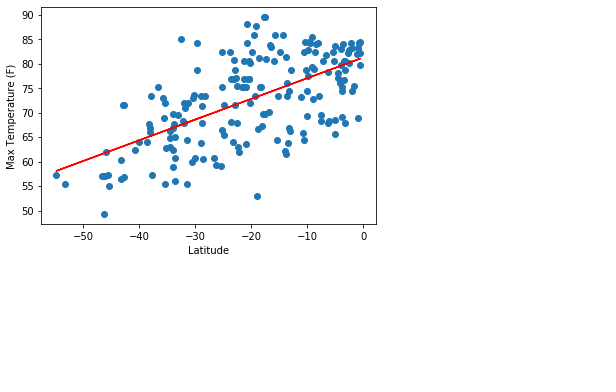

In [27]:
# Store data as x and y values
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Southern_Hemisphere-Max_Temp_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

### Analysis
Comparing max temp vs. latitude in the northern hemisphere to the southern hemisphere shows that max temp decreases as you move away from the equator in both hemispheres. The correlation between max temp and latitude in the southern hemisphere is strong; however, max temps in the northern hemisphere decrease at a higher rate than in the southern hemisphere, with a very strong negative correlation between the 2 factors. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30468215852374014


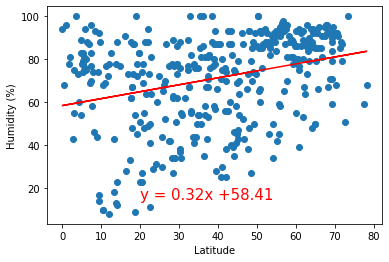

In [28]:
# Store data as x and y values
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Northern_Hemisphere-Humidity_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3818122043650436


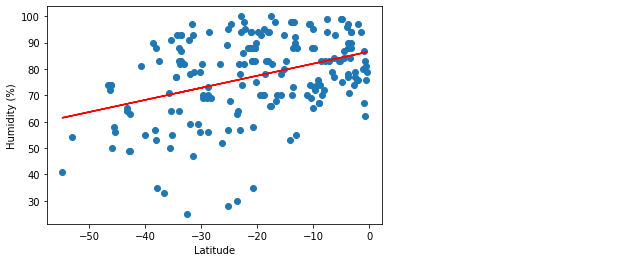

In [29]:
# Store data as x and y values
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Southern_Hemisphere-Humidity_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

### Analysis
Looking at humidity vs. latitude in the northern and southern hemispheres, there is a weak correlation between the 2 factors.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15350353179125031


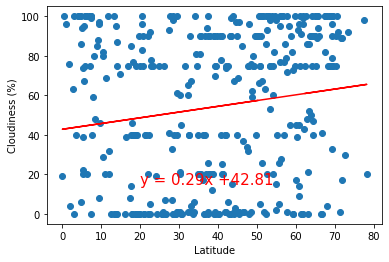

In [30]:
# Store data as x and y values
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Northern_Hemisphere-Cloudiness_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3215336911699051


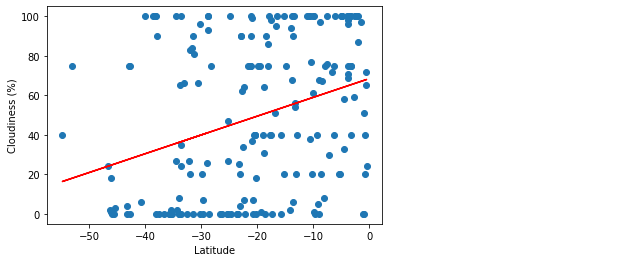

In [31]:
# Store data as x and y values
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Southern_Hemisphere-Cloudiness_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

### Analysis
Comparing cloudiness vs. latitude, there is very weak correlation in the northern hemisphere and weak correlation in the southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1708073281614579


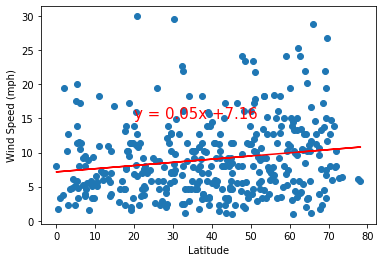

In [32]:
# Store data as x and y values
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Northern_Hemisphere-Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2778759722800574


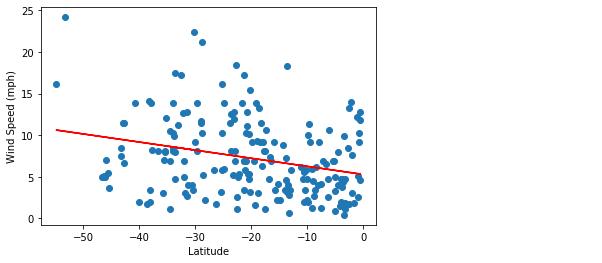

In [33]:
# Store data as x and y values
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Southern_Hemisphere-Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

### Analysis
Looking at wind speed vs. latitude, there is very weak correlation in both the northern and southern hemispheres.